# Regression Modelling for Distillation Column Data

This notebook loads the cleaned dataset, builds regression models to predict ethanol concentration, evaluates performance, and interprets feature importance.

# 1. Load the Cleaned Dataset
Load the cleaned data from the previous EDA notebook.

In [1]:
# Load cleaned dataset
import pandas as pd

df = pd.read_csv('cleaned_distillation.csv')
df.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T13,T14,L,V,D,B,F,Ethanol concentration,TempDiff,mean_Temp
0,350.885381,351.022880,351.416830,350.991293,351.043249,352.247170,351.926402,351.182248,352.207654,351.810226,...,362.131652,370.324754,780,1040,256.005060,329.005618,603.745603,0.813819,19.439374,353.942560
1,350.908968,350.884595,350.978038,350.480246,350.818546,351.239338,350.460510,351.716292,351.186567,351.797249,...,362.188442,370.277741,780,1040,265.844017,326.747621,602.489505,0.817550,19.368773,353.663551
2,350.856577,350.973094,350.975776,350.946188,350.899856,350.205772,350.717482,351.018981,352.413241,352.184183,...,359.830253,369.650563,780,1040,264.345838,351.191602,611.100192,0.833115,18.793986,353.300410
3,350.851068,350.989771,350.792004,350.899665,350.478331,350.362248,351.788506,352.373490,351.473240,352.630748,...,358.759464,370.011167,780,1040,259.745463,356.984362,568.774514,0.849943,19.160100,353.382487
4,350.820010,350.880325,350.379083,350.876779,351.198072,352.013836,350.810999,350.693907,351.094507,352.510426,...,357.669513,367.874454,780,1040,266.882029,332.379144,596.094502,0.843223,17.054444,353.034198


# 2. Define Features and Target
Select T1–T14, D, B, F, TempDiff, (optionally mean_Temp) as features. Target is Ethanol concentration.

In [2]:
# Define features and target
tray_cols = [f'T{i}' for i in range(1, 15) if f'T{i}' in df.columns]
feature_cols = tray_cols + ['D', 'B', 'F', 'TempDiff']
if 'mean_Temp' in df.columns:
    feature_cols.append('mean_Temp')
X = df[feature_cols]
y = df['Ethanol concentration']
X.head(), y.head()

(           T1          T2          T3          T4          T5          T6  \
 0  350.885381  351.022880  351.416830  350.991293  351.043249  352.247170   
 1  350.908968  350.884595  350.978038  350.480246  350.818546  351.239338   
 2  350.856577  350.973094  350.975776  350.946188  350.899856  350.205772   
 3  350.851068  350.989771  350.792004  350.899665  350.478331  350.362248   
 4  350.820010  350.880325  350.379083  350.876779  351.198072  352.013836   
 
            T7          T8          T9         T10         T11         T12  \
 0  351.926402  351.182248  352.207654  351.810226  352.632111  355.373989   
 1  350.460510  351.716292  351.186567  351.797249  352.284701  356.068477   
 2  350.717482  351.018981  352.413241  352.184183  351.157341  354.376434   
 3  351.788506  352.373490  351.473240  352.630748  352.685663  353.259449   
 4  350.810999  350.693907  351.094507  352.510426  352.559687  353.097169   
 
           T13         T14           D           B          

# 3. Train/Test Split
Split the data into training and test sets (80/20 split).

In [3]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (2831, 19)
Test shape: (708, 19)


# 4. Train Regression Models
Train Linear Regression, Random Forest, and XGBoost regressors.

In [4]:
# Train models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f'{name} trained.')

Linear Regression trained.
Random Forest trained.
Random Forest trained.
XGBoost trained.
XGBoost trained.


# 5. Evaluate Models
Evaluate each model using MAE, RMSE, and R² on the test set. Plot predicted vs actual values.

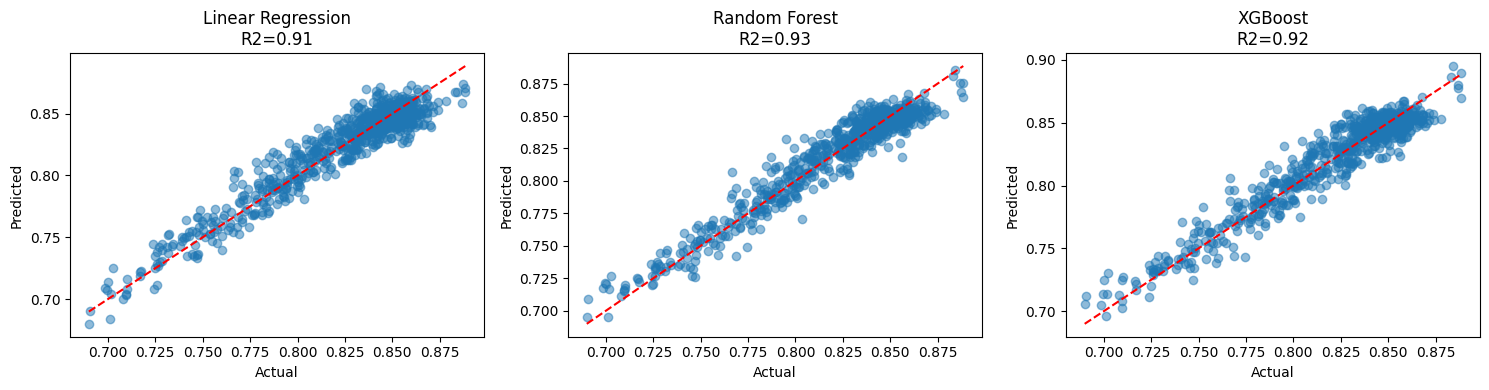

,MAE,RMSE,R2
Linear Regression,0.009479,0.011791,0.913064
Random Forest,0.008344,0.010468,0.931480
XGBoost,0.009086,0.011428,0.918346


In [5]:
# Evaluate models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

results = {}
plt.figure(figsize=(15, 4))
for i, (name, model) in enumerate(trained_models.items()):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
    # Plot
    plt.subplot(1, 3, i+1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name}\nR2={r2:.2f}')
plt.tight_layout()
plt.show()

# Show metrics
pd.DataFrame(results).T

# 6. Model Interpretability
Show top 5 most important features using feature importance or SHAP.

In [6]:
import seaborn as sns

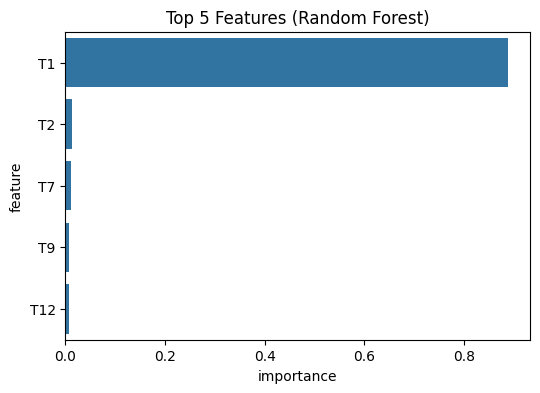

In [7]:
# Feature importance (using Random Forest or XGBoost)
importances = None
best_model_name = max(results, key=lambda k: results[k]['R2'])
if best_model_name in ['Random Forest', 'XGBoost']:
    model = trained_models[best_model_name]
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feat_names = X.columns
        imp_df = pd.DataFrame({'feature': feat_names, 'importance': importances})
        imp_df = imp_df.sort_values('importance', ascending=False).head(5)
        plt.figure(figsize=(6,4))
        sns.barplot(x='importance', y='feature', data=imp_df)
        plt.title(f'Top 5 Features ({best_model_name})')
        plt.show()
    else:
        print('Model does not support feature_importances_.')
else:
    print('Best model does not support feature importances.')

# 7. Save Best Model
Save the best performing model using joblib.

In [8]:
# Save the best model
import joblib

best_model = trained_models[best_model_name]
joblib.dump(best_model, f'best_model_{best_model_name.replace(" ", "_").lower()}.joblib')
print(f'Best model ({best_model_name}) saved.')

Best model (Random Forest) saved.


# 8. Hybrid Model: Random Forest + PINN
Train a Random Forest for initial prediction, then train a PINN to learn the residuals (errors) between RF predictions and true ethanol concentrations, imposing physics-based constraints during PINN training.

In [9]:
# Import PINN and prepare data for PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from pinn import PINN, pinn_loss

# Prepare data
def to_tensor(df):
    return torch.tensor(df.values, dtype=torch.float32)

X_train_t = to_tensor(X_train)
X_test_t = to_tensor(X_test)
y_train_t = to_tensor(y_train).unsqueeze(1)
y_test_t = to_tensor(y_test).unsqueeze(1)

# Indices for F, D, B columns (needed for PINN loss)
F_idx = X_train.columns.get_loc('F')
D_idx = X_train.columns.get_loc('D')
B_idx = X_train.columns.get_loc('B')

# Get RF predictions and compute residuals
y_train_rf = trained_models['Random Forest'].predict(X_train)
y_test_rf = trained_models['Random Forest'].predict(X_test)
residual_train = y_train.values - y_train_rf
residual_test = y_test.values - y_test_rf
residual_train_t = torch.tensor(residual_train, dtype=torch.float32).unsqueeze(1)
residual_test_t = torch.tensor(residual_test, dtype=torch.float32).unsqueeze(1)

In [10]:
# Train PINN on RF residuals
pinn = PINN(X_train.shape[1])
optimizer = torch.optim.Adam(pinn.parameters(), lr=0.001)

batch_size = 64
dataset = TensorDataset(X_train_t, residual_train_t)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

n_epochs = 100
for epoch in range(n_epochs):
    pinn.train()
    total_loss = 0
    for xb, yb in loader:
        optimizer.zero_grad()
        preds = pinn(xb)
        loss, data_loss, mass_loss, bounds_loss = pinn_loss(preds, yb, xb, F_idx, D_idx, B_idx)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if (epoch+1) % 20 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {total_loss/len(loader):.4f}")

# Evaluate PINN on test set
pinn.eval()
pred_pinn_resid = pinn(X_test_t).detach().numpy().flatten()
pred_pinn_final = y_test_rf + pred_pinn_resid

Epoch 20/100, Loss: 310160.1674
Epoch 40/100, Loss: 310123.4729
Epoch 40/100, Loss: 310123.4729
Epoch 60/100, Loss: 310106.0333
Epoch 60/100, Loss: 310106.0333
Epoch 80/100, Loss: 308804.1354
Epoch 80/100, Loss: 308804.1354
Epoch 100/100, Loss: 312430.2955
Epoch 100/100, Loss: 312430.2955


Hybrid RF+PINN:   MAE=0.008344, RMSE=0.010468, R2=0.931480


c:\Users\sneha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


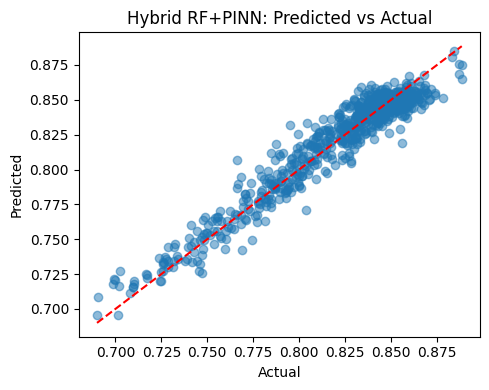

In [11]:
# Compare Hybrid RF+PINN performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_pinn = mean_absolute_error(y_test, pred_pinn_final)
rmse_pinn = mean_squared_error(y_test, pred_pinn_final, squared=False)
r2_pinn = r2_score(y_test, pred_pinn_final)

print('Hybrid RF+PINN:   MAE={:.6f}, RMSE={:.6f}, R2={:.6f}'.format(mae_pinn, rmse_pinn, r2_pinn))

import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.scatter(y_test, pred_pinn_final, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Hybrid RF+PINN: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()